In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import nolds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [129]:
def freq_feat(data):
    d = abs(data-np.mean(data))
    f = abs(np.fft.fft(d))
    fs = np.fft.fftfreq(len(d),d=1/300)
    
    return [np.mean(f), np.std(f), stats.skew(f), stats.kurtosis(f), fs[np.argmax(f[1:])+1]]
    

In [130]:
def calc_feat(data):
    feat = []
    feat_nm = ['mean_x', 'mean_y', 'mean_z', 'mean_mag', 'std_x', 'std_y', 'std_z', 'std_mag',
               'skew_x', 'skew_y', 'skew_z', 'skew_mag', 'kurt_x', 'kurt_y', 'kurt_z', 'kurt_mag',
               'sen_x', 'sen_y', 'sen_z', 'sen_mag', 'fmean', 'fstd', 'fskew', 'fkurt', 'ffreq',
               'mean_gx', 'mean_gy', 'mean_gz', 'mean_gmag', 'std_gx', 'std_gy', 'std_gz', 'std_gmag',
               'skew_gx', 'skew_gy', 'skew_gz', 'skew_gmag', 'kurt_gx', 'kurt_gy', 'kurt_gz', 'kurt_gmag',
               'sen_gx', 'sen_gy', 'sen_gz', 'sen_gmag', 'fmean_g', 'fstd_g', 'fskew_g', 'fkurt_g', 'ffreq_g']
    
    ts = data['time(s)']
    x = data['x(g)']
    y = data['y(g)']
    z = data['z(g)']
    mag = (x**2+y**2+z**2)**.5
    
    gx = data['gx']
    gy = data['gy']
    gz = data['gz']
    gmag = (gx**2+gy**2+gz**2)**.5
    
    feat.append(np.mean(x)), feat.append(np.mean(y)), feat.append(np.mean(z)), feat.append(np.mean(mag))
    feat.append(np.std(x)), feat.append(np.std(y)), feat.append(np.std(z)), feat.append(np.std(mag))
    feat.append(stats.skew(x)), feat.append(stats.skew(y)), feat.append(stats.skew(z)), feat.append(stats.skew(mag))
    feat.append(stats.kurtosis(x)), feat.append(stats.kurtosis(y)), feat.append(stats.kurtosis(z)), feat.append(stats.kurtosis(mag))
    
    feat.append(nolds.sampen(x[::5])), feat.append(nolds.sampen(y[::5])), feat.append(nolds.sampen(z[::5])), feat.append(nolds.sampen(mag[::5]))

    for val in freq_feat(mag.values):
        feat.append(val)
    
    feat.append(np.mean(gx)), feat.append(np.mean(gy)), feat.append(np.mean(gz)), feat.append(np.mean(gmag))
    feat.append(np.std(gx)), feat.append(np.std(gy)), feat.append(np.std(gz)), feat.append(np.std(gmag))
    feat.append(stats.skew(gx)), feat.append(stats.skew(gy)), feat.append(stats.skew(gz)), feat.append(stats.skew(gmag))
    feat.append(stats.kurtosis(gx)), feat.append(stats.kurtosis(gy)), feat.append(stats.kurtosis(gz)), feat.append(stats.kurtosis(gmag))
    
    feat.append(nolds.sampen(gx[::5])), feat.append(nolds.sampen(gy[::5])), feat.append(nolds.sampen(gz[::5])), feat.append(nolds.sampen(gmag[::5]))
    
    for val in freq_feat(gmag.values):
        feat.append(val)
    
    return pd.Series(data = feat, index = feat_nm)

In [131]:
def gen_clips(data, clipsize=60, overlap = .5):
    Features = pd.DataFrame(columns = ['mean_x', 'mean_y', 'mean_z', 'mean_mag', 'std_x', 'std_y', 'std_z', 'std_mag',
               'skew_x', 'skew_y', 'skew_z', 'skew_mag', 'kurt_x', 'kurt_y', 'kurt_z', 'kurt_mag',
               'sen_x', 'sen_y', 'sen_z', 'sen_mag', 'fmean', 'fstd', 'fskew', 'fkurt', 'ffreq',
               'mean_gx', 'mean_gy', 'mean_gz', 'mean_gmag', 'std_gx', 'std_gy', 'std_gz', 'std_gmag',
               'skew_gx', 'skew_gy', 'skew_gz', 'skew_gmag', 'kurt_gx', 'kurt_gy', 'kurt_gz', 'kurt_gmag',
               'sen_gx', 'sen_gy', 'sen_gz', 'sen_gmag', 'fmean_g', 'fstd_g', 'fskew_g', 'fkurt_g', 'ffreq_g'])
    ts = data['time(s)']
    tslen = max(ts)-min(ts)
    for ind in range(int((tslen-clipsize)/(clipsize*(1-overlap)))+1):
        start_ts = min(ts)+ind*(clipsize*(1-overlap))
        clipInds = (ts>=start_ts) & (ts<start_ts+clipsize)
        Features.loc[start_ts,:] = calc_feat(data[clipInds])
        
    return Features
        
    

In [132]:
CPFeat = pd.DataFrame(columns=['mean_x', 'mean_y', 'mean_z', 'mean_mag', 'std_x', 'std_y', 'std_z', 'std_mag',
               'skew_x', 'skew_y', 'skew_z', 'skew_mag', 'kurt_x', 'kurt_y', 'kurt_z', 'kurt_mag',
               'sen_x', 'sen_y', 'sen_z', 'sen_mag', 'fmean', 'fstd', 'fskew', 'fkurt', 'ffreq',
               'mean_gx', 'mean_gy', 'mean_gz', 'mean_gmag', 'std_gx', 'std_gy', 'std_gz', 'std_gmag',
               'skew_gx', 'skew_gy', 'skew_gz', 'skew_gmag', 'kurt_gx', 'kurt_gy', 'kurt_gz', 'kurt_gmag',
               'sen_gx', 'sen_gy', 'sen_gz', 'sen_gmag', 'fmean_g', 'fstd_g', 'fskew_g', 'fkurt_g', 'ffreq_g'])
NormFeat = pd.DataFrame(columns=['mean_x', 'mean_y', 'mean_z', 'mean_mag', 'std_x', 'std_y', 'std_z', 'std_mag',
               'skew_x', 'skew_y', 'skew_z', 'skew_mag', 'kurt_x', 'kurt_y', 'kurt_z', 'kurt_mag',
               'sen_x', 'sen_y', 'sen_z', 'sen_mag', 'fmean', 'fstd', 'fskew', 'fkurt', 'ffreq',
               'mean_gx', 'mean_gy', 'mean_gz', 'mean_gmag', 'std_gx', 'std_gy', 'std_gz', 'std_gmag',
               'skew_gx', 'skew_gy', 'skew_gz', 'skew_gmag', 'kurt_gx', 'kurt_gy', 'kurt_gz', 'kurt_gmag',
               'sen_gx', 'sen_gy', 'sen_gz', 'sen_gmag', 'fmean_g', 'fstd_g', 'fskew_g', 'fkurt_g', 'ffreq_g'])

In [133]:
for ind in ['1', '2', '3', '4']:
    CP = pd.read_csv('Arun/CP/dev' + ind + '.txt',sep='\t')
    Normal = pd.read_csv('Arun/Normal/dev' + ind + '.txt',sep='\t')
    
    CP = gen_clips(CP,overlap=.75)
    Normal = gen_clips(Normal,overlap=.75)
    
    CPFeat = pd.concat((CPFeat,CP),axis=0)
    NormFeat = pd.concat((NormFeat,Normal),axis=0)

In [99]:
pca = PCA()
scaler = StandardScaler()

In [100]:
featList = ['mean_mag', 'std_mag', 'skew_mag', 'kurt_mag','sen_mag', 'fmean', 'fstd', 'fskew', 'fkurt', 'ffreq',
            'mean_gmag', 'std_gmag', 'skew_gmag', 'kurt_gmag','sen_gmag','fmean_g', 'fstd_g', 'fskew_g', 'fkurt_g', 'ffreq_g']

In [101]:
Feat = pd.concat((NormFeat.loc[:,featList],CPFeat.loc[:,featList]))
Feat.loc[:,:] = scaler.fit_transform(Feat)

In [102]:
P = pca.fit_transform(Feat)

In [103]:
c = ['b', 'r']
col = c[1]*len(NormFeat)+c[0]*len(CPFeat)

In [120]:
NormFeat.shape

(158, 50)

In [127]:
Feat.iloc[len(NormFeat):,:].mean()

mean_mag    -0.519647
std_mag     -0.736454
skew_mag    -0.096245
kurt_mag     0.082041
sen_mag      0.019664
fmean       -0.748925
fstd        -0.726445
fskew       -0.031886
fkurt       -0.056360
ffreq        0.000000
mean_gmag   -0.573652
std_gmag    -0.651150
skew_gmag   -0.003311
kurt_gmag   -0.116505
sen_gmag    -0.453966
fmean_g     -0.651427
fstd_g      -0.666990
fskew_g     -0.257622
fkurt_g     -0.295159
ffreq_g      0.000000
dtype: float64

In [128]:
Feat.iloc[0:len(NormFeat),:].mean()

mean_mag     0.539380
std_mag      0.764421
skew_mag     0.099899
kurt_mag    -0.085157
sen_mag     -0.020411
fmean        0.777366
fstd         0.754031
fskew        0.033097
fkurt        0.058500
ffreq        0.000000
mean_gmag    0.595436
std_gmag     0.675877
skew_gmag    0.003437
kurt_gmag    0.120929
sen_gmag     0.471206
fmean_g      0.676164
fstd_g       0.692319
fskew_g      0.267405
fkurt_g      0.306368
ffreq_g      0.000000
dtype: float64

In [119]:
Feat

,mean_mag,std_mag,skew_mag,kurt_mag,sen_mag,fmean,fstd,fskew,fkurt,ffreq,mean_gmag,std_gmag,skew_gmag,kurt_gmag,sen_gmag,fmean_g,fstd_g,fskew_g,fkurt_g,ffreq_g
2860.33,-0.634054,-0.060843,0.088706,-0.159858,-0.616724,0.022975,-0.121920,-0.165708,-0.277161,0.0,-0.024823,-0.066534,-0.688512,-0.529344,0.036682,-0.127298,-0.088061,0.681145,0.504494,0.0
2875.33,-0.280499,0.401886,-0.470537,-0.418743,-0.496347,0.272158,0.349800,0.386832,0.138390,0.0,0.331496,0.136746,-1.063574,-0.679460,0.272097,0.009336,0.118747,1.380485,1.170735,0.0
2890.33,0.266303,0.702409,-0.387418,-0.411668,-0.256486,0.745200,0.591504,0.287196,0.129601,0.0,0.783533,0.507771,-0.084550,0.152706,1.223331,0.668931,0.427855,0.758672,0.649975,0.0
2905.33,0.214199,0.865359,-0.363403,-0.419543,-0.056244,0.855779,0.753029,0.100447,0.030989,0.0,0.927190,0.719863,-0.047262,0.008131,1.236874,0.871604,0.634013,0.393733,0.337547,0.0
2920.33,0.747225,1.366702,-0.368151,-0.450863,0.203524,1.253658,1.236710,0.281365,0.235493,0.0,1.345833,0.982927,-0.518593,-0.364630,1.488212,1.064096,0.900903,0.732618,0.613199,0.0
2935.33,2.247205,2.198341,-0.399444,-0.490321,-0.039964,1.733503,2.070828,0.717751,0.574821,0.0,1.988986,1.752632,-0.876218,-0.635880,1.111000,1.475647,1.705629,0.897519,0.705311,0.0
2950.33,2.087451,2.081577,-0.370375,-0.483465,0.165296,1.517047,1.980150,0.593087,0.424713,0.0,1.790819,1.599951,-0.826350,-0.642117,0.910115,1.148632,1.584792,0.604534,0.425700,0.0
2965.33,2.077879,1.856041,-0.274817,-0.465068,-0.111412,1.233266,1.780921,0.431121,0.206597,0.0,1.507154,1.485728,-0.732829,-0.613190,0.551346,0.977166,1.482161,0.418415,0.211777,0.0
2980.33,1.544980,1.500534,-0.129475,-0.427480,0.089895,0.908512,1.446314,0.072212,-0.175881,0.0,1.174614,1.250125,-0.328326,-0.446490,0.627820,0.786233,1.247090,-0.325298,-0.434817,0.0
2995.33,0.107977,-0.235000,-0.560863,-0.434117,1.654459,-0.251331,-0.260412,0.754256,0.715939,0.0,0.342353,-0.317232,-1.227415,-0.703802,2.941485,-0.307254,-0.341486,1.504143,1.282037,0.0


In [115]:
Feat.shape

(322, 20)

In [104]:
pca.components_

array([[  2.41001418e-01,   3.26719710e-01,  -1.10611369e-01,
         -1.69626054e-01,  -1.91564168e-02,   3.22433851e-01,
          3.35055460e-01,   1.36797518e-01,   1.33002086e-01,
          0.00000000e+00,   3.14690992e-01,   3.10105524e-01,
         -1.44748353e-01,  -1.19184891e-01,   1.62843878e-01,
          3.07719645e-01,   3.23234913e-01,   2.06099872e-01,
          2.06514857e-01,   0.00000000e+00],
       [ -5.24948227e-02,  -1.68709822e-01,  -3.45754605e-01,
         -2.61008503e-01,   2.83457116e-01,  -1.65916632e-01,
         -1.29338836e-01,   3.48573234e-01,   3.29751557e-01,
          1.05879118e-22,  -9.95856666e-02,  -1.91379237e-01,
         -3.15630886e-01,  -3.03270115e-01,   1.50847518e-01,
         -1.89904851e-01,  -1.67155454e-01,   2.37703578e-01,
          2.11810567e-01,  -0.00000000e+00],
       [ -1.24369708e-02,  -2.00379527e-02,   5.79656132e-02,
          1.07331319e-01,   4.75082101e-01,  -1.04477629e-02,
         -1.30299298e-02,   3.35216637e-01

In [105]:
pca.explained_variance_ratio_

array([  4.35720845e-01,   2.32873264e-01,   1.21124895e-01,
         8.41590948e-02,   4.14969065e-02,   2.91590085e-02,
         2.37024804e-02,   1.04681708e-02,   7.86675707e-03,
         4.82425241e-03,   3.52322644e-03,   2.28377248e-03,
         1.55342418e-03,   6.09003932e-04,   3.16521762e-04,
         2.10797154e-04,   1.01986893e-04,   5.59291591e-06,
         3.54487537e-39,   0.00000000e+00])

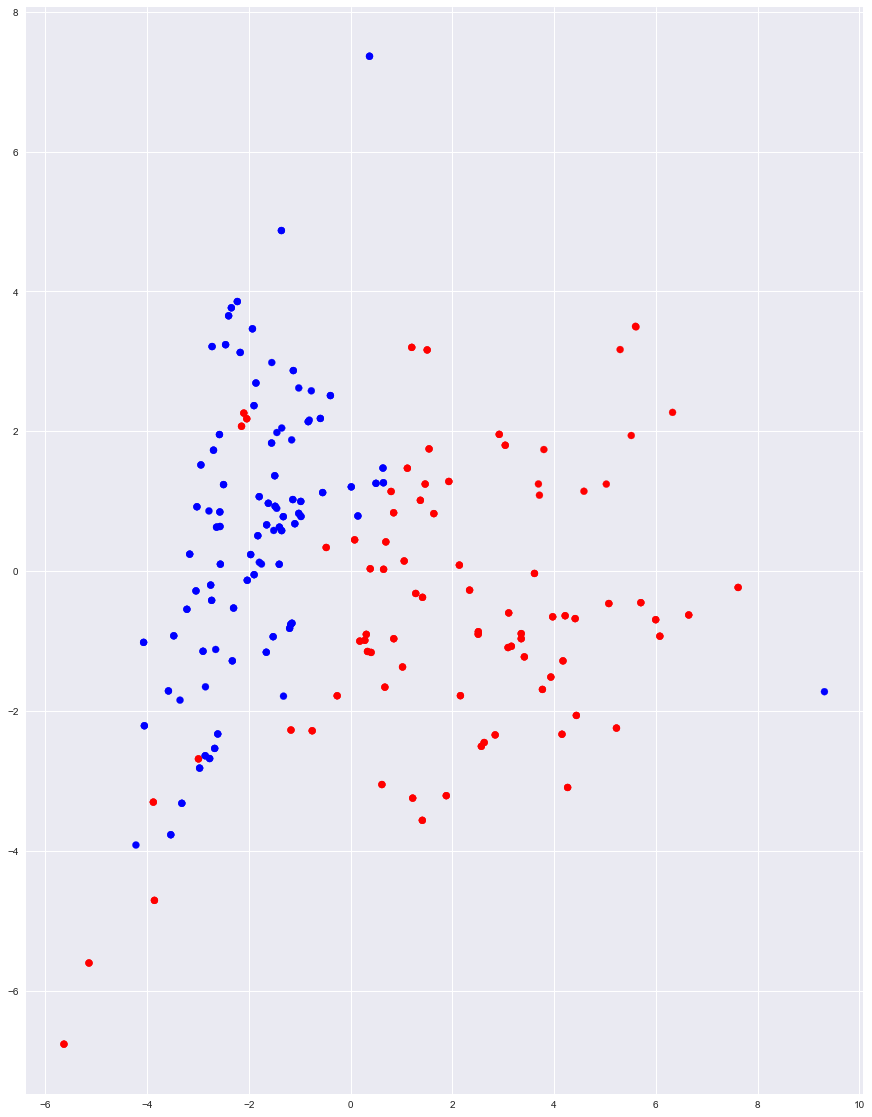

In [106]:
# Overlap = .75, all
plt.figure(figsize=(15,20))
plt.scatter(P[:,0],P[:,1],c = col)

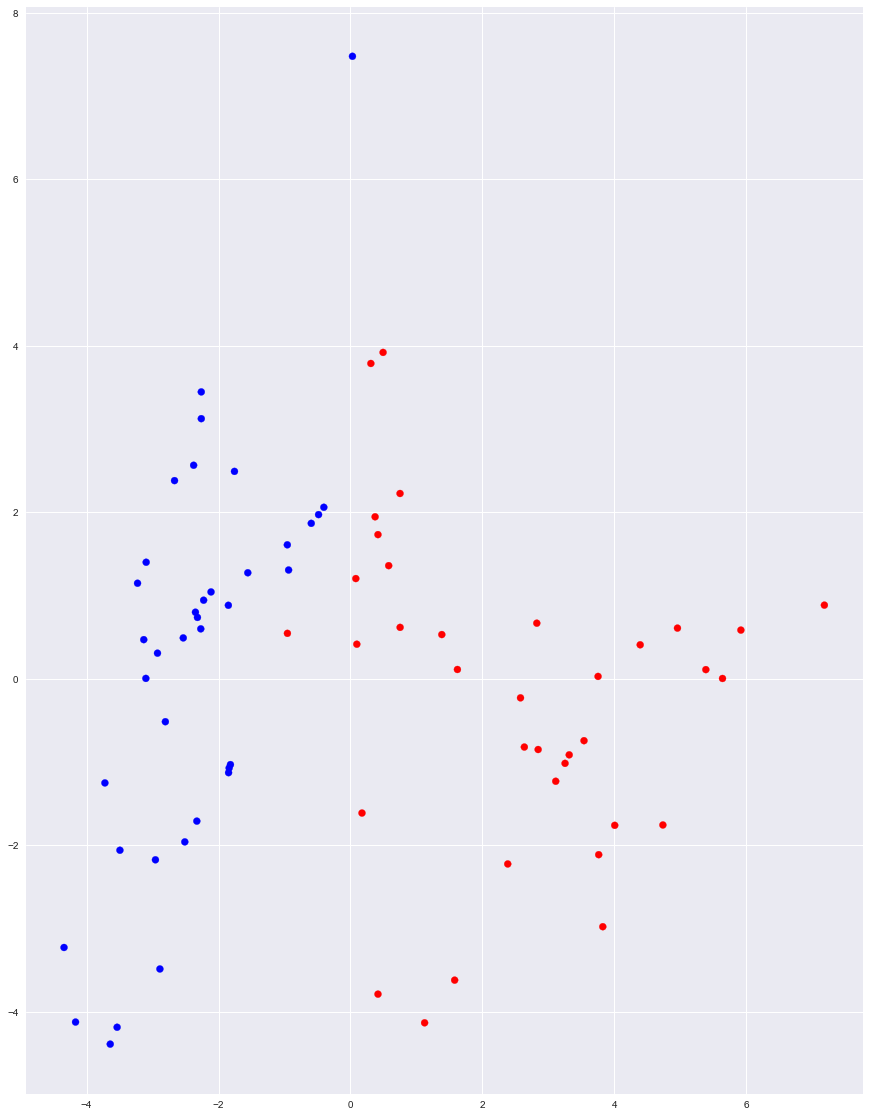

In [88]:
# Overlap = .75, dev4
plt.figure(figsize=(15,20))
plt.scatter(P[:,0],P[:,1],c = col)

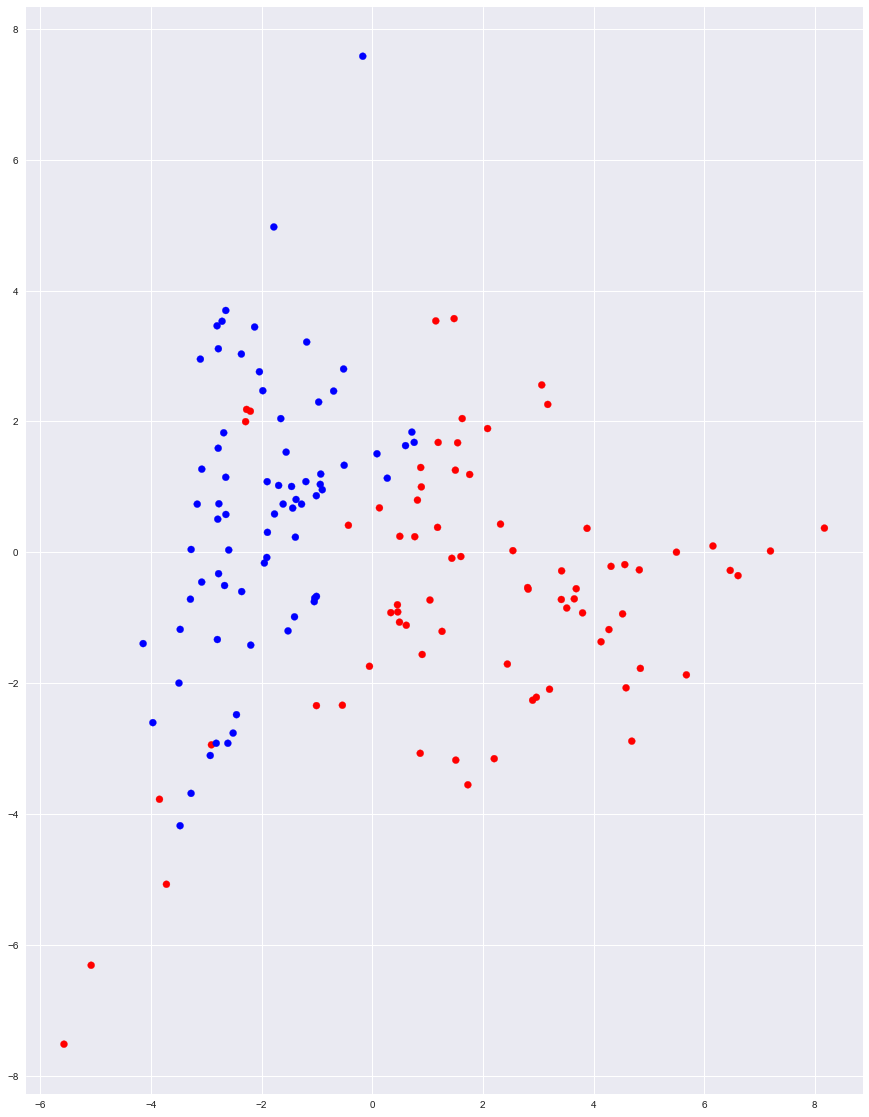

In [97]:
# Overlap = .75, dev3
plt.figure(figsize=(15,20))
plt.scatter(P[:,0],P[:,1],c = col)

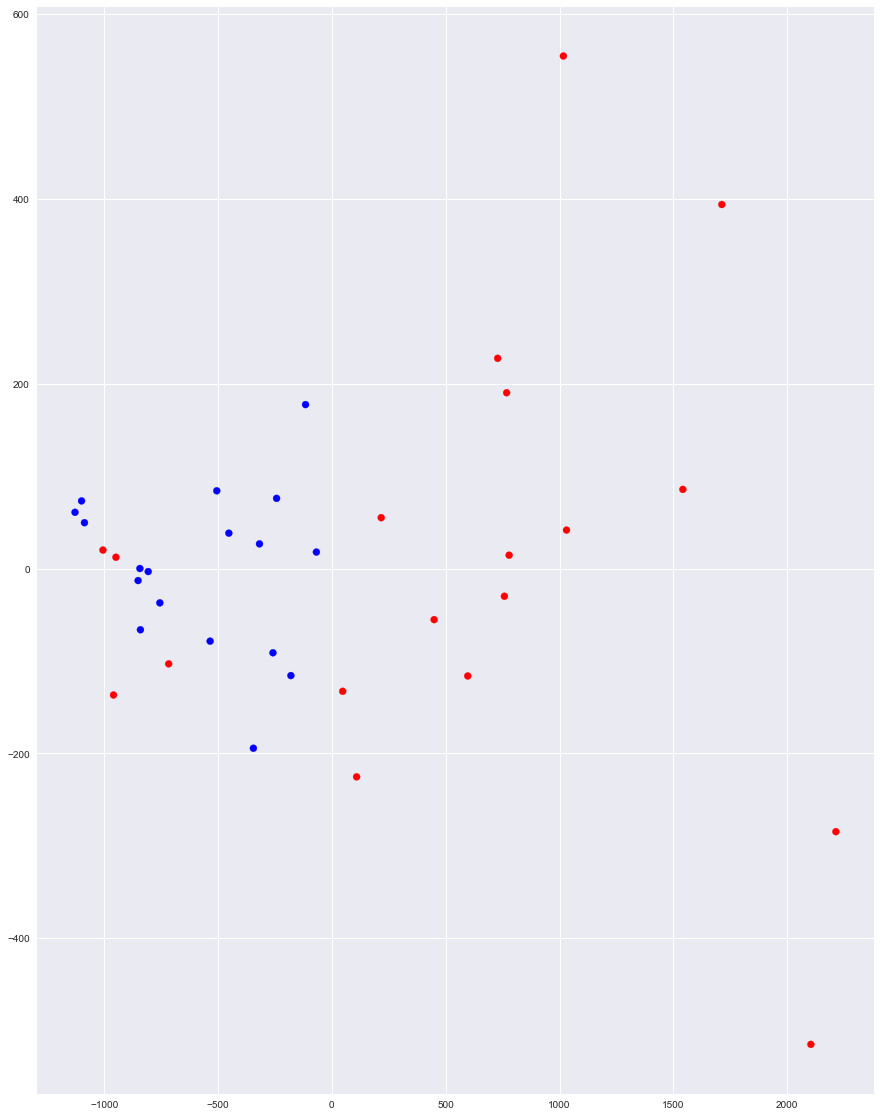

In [45]:

# Overlap = .5
plt.figure(figsize=(15,20))
plt.scatter(P[:,0],P[:,1],c = col)

C:\Users\nshawen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


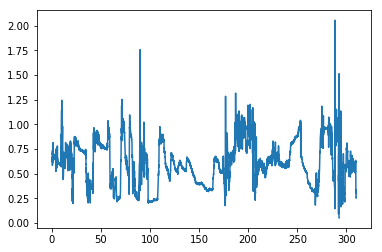

In [26]:
plt.plot(D['time(s)'],D.apply(lambda x: (x['x(g)']**2 + x['y(g)']**2 + x['z(g)'])**.5,axis=1)*0.0312)

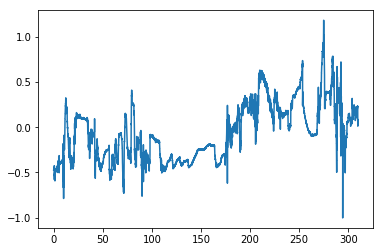

In [27]:
plt.plot(D['time(s)'],D['x(g)']*0.0312)

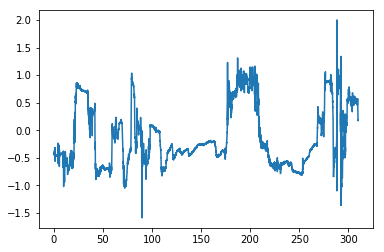

In [28]:
plt.plot(D['time(s)'],D['y(g)']*0.0312)

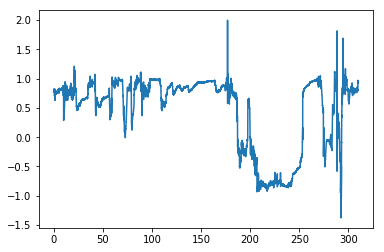

In [29]:
plt.plot(D['time(s)'],D['z(g)']*0.0312)